In this notebook we will be using the smtd_preprocessing.py file which is a preprocessing pileline for twitter data to pre-process our tweets and then train our own twitter embeddings. <br>
We can find pre-trained twitter embedding 


In [22]:
import os
import sys
import pandas as pd
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

# PATH = ""
# preprocessing_path = "O5smtd_preprocessing.py"
# sys.path.append(os.path.abspath("./"))
# import O5_smtd_preprocessing

PATH = "./"
preprocessing_path = PATH+"smtd_preprocessing.py"
sys.path.append(os.path.abspath(preprocessing_path))
import smtd_preprocessing


Let's use the dir() function to find all the properties and methods in the package.

In [23]:
dir(smtd_preprocessing)

['Entity',
 'Punct',
 'PunctChars',
 'TweetTokenizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'deEmojify',
 'demoji',
 'identify_AlphaNumerics',
 'identify_Savings',
 'indentify_Money',
 'indentify_Offers',
 'indentify_Promos',
 'indentify_freebies',
 'neg_lookahead',
 'optional',
 'pos_lookahead',
 'printable',
 'process_BrandMentions',
 'process_BrandName',
 'process_Dates',
 'process_EmailIds',
 'process_HashTags',
 'process_Mentions',
 'process_NonBrandMentions',
 'process_Times',
 'process_TweetText',
 'process_URLs',
 'process_Websites',
 'prune_multple_consecutive_same_char',
 're',
 'regex_or',
 'remove_emoji',
 'remove_spl_words',
 'replace_numbers',
 'string',
 'strip_unicode',
 'strip_whiteSpaces',
 'to_LowerCase',
 'trim']

## Read Data
Let's read the data. Normally in csv files the values are separated by a ','.<br> In this case, it is separated by a ';' so we will specify the delimiter as ';'.

In [24]:
datapath = "../Data/sts_gold_tweet.csv"
df = pd.read_csv(datapath,on_bad_lines="skip",delimiter=";")

In [25]:
#let's have a loof at the dataset
df.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [26]:
#pre-process tweets using our package 
df['tweet'] = df['tweet'].apply(lambda x: smtd_preprocessing.process_TweetText(x))
df['tweet'] = df['tweet'].apply(lambda x: tweet_tokenizer.tokenize(x))
tweets = df['tweet'].values

## Train Embeddings
Let's train our own embeddings.

In [27]:
#CBOW
import time
start = time.time()
word2vec_tweet = Word2Vec(tweets,min_count=5, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.5f} sec ".format((end-start)))

CBOW Model Training Complete.
Time taken for training is:0.10733 sec 


In [30]:
#Summarize the loaded model
print("Summary of the model:",word2vec_tweet)

#Summarize vocabulary
words = list(word2vec_tweet.wv.index_to_key )
print("Small part of Vocabulary of our model:",words[:10])

#Acess vector for one word
print("Acess Vector for the word 'lol'",word2vec_tweet.wv['lol'])

Summary of the model: Word2Vec<vocab=774, vector_size=100, alpha=0.025>
Small part of Vocabulary of our model: ['!', '.', 'i', 'to', 'constantnonbrandmention', 'the', ',', 'and', 'a', 'my']
Acess Vector for the word 'lol' [-0.25910544  0.14407301  0.051521    0.13794026  0.10984614 -0.3195642
  0.059721    0.55731875 -0.24992304 -0.1105891  -0.11369446 -0.38653222
 -0.03365812  0.15672028  0.08112012 -0.1293225   0.22980613 -0.3255905
 -0.1363721  -0.5577476   0.0531457   0.05157173  0.1521731  -0.18301512
 -0.09432556 -0.00695136 -0.24593504 -0.06864514 -0.29199398 -0.01539919
  0.29404122 -0.03904498  0.11607976 -0.17940998 -0.22065069  0.4704652
  0.05687749 -0.21198416 -0.08619551 -0.42970744 -0.0288036  -0.1372277
 -0.22671142  0.00355149  0.27588394 -0.09007328 -0.26550582 -0.11226692
  0.1496724   0.16877405  0.19265291 -0.19854553 -0.01025926 -0.07677138
 -0.11835463  0.07968209  0.12327638 -0.1099499  -0.22398359  0.15299219
 -0.05551803 -0.00810529  0.20368108 -0.09609725 -0.

In [31]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE

In [33]:
#Preprocessing our models vocabulary to make better visualizations
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab= list(word2vec_tweet.wv.index_to_key)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words('english')
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words


Size of Vocabulary: 774
Few words in Vocabulary ['!', '.', 'i', 'to', 'constantnonbrandmention', 'the', ',', 'and', 'a', 'my', '..', 'in', 'is', 'for', 'on', 'it', 'constantnum', 'you', 'of', '?', 'me', 'have', 'so', 'that', 'with', 'just', "i'm", 'was', 'but', 'not', 'at', 'this', 'be', 'now', 'up', 'get', 'all', 'no', 'go', 'are', 'got', 'from', '-', 'going', '"', 'constantalphanum', 'good', 'day', 'about', 'today']
Size of Vocabulary without stopwords: 654
Few words in Vocabulary without stopwords ['!', '.', 'constantnonbrandmention', ',', '..', 'constantnum', '?', "i'm", 'get', 'go', 'got', '-', 'going', '"', 'constantalphanum', 'good', 'day', 'today', 'love', 'headache', 'work', "can't", 'sad', 'like', 'constanturl', 'cancer', 'constanthashtag', 'back', 'cavs', 'iphone']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mccar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['weekend','twitter','mcdonalds','coffee']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_tweet.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(word2vec_tweet.wv[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [37]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-0.23396909  0.12025025  0.0454405   0.12856649  0.08078113 -0.29256755
  0.03875476  0.4790997  -0.22245567 -0.0897628  -0.09586577 -0.33057898
 -0.03625616  0.14166863  0.07711219 -0.11565018  0.20744623 -0.28862393
 -0.10191246 -0.48610368  0.04305795  0.04976128  0.1306978  -0.1532131
 -0.09873183  0.00355866 -0.21446513 -0.06022254 -0.24046612 -0.01864499
  0.24897112 -0.03374087  0.11305819 -0.14793585 -0.20008922  0.40121084
  0.05217542 -0.18834637 -0.06673679 -0.37862235 -0.02828174 -0.13357474
 -0.18156399 -0.00574778  0.23956792 -0.07776643 -0.23146714 -0.10142095
  0.13294339  0.14098077  0.16910793 -0.17799729 -0.01452784 -0.05864683
 -0.1033523   0.0569796   0.10740475 -0.1016897  -0.20028135  0.12727107
 -0.05356726 -0.00237996  0.16404916 -0.09071293 -0.33163422  0.13348418
  0.11557188  0.30524048 -0.3197349   0.2776891  -0.07922257  0.1886444
  0.22953469  0.08935907  0.22397453  0.09139021 -0.02729139 -0.04085929
 -0.18478349  0.03503764 -0.12069

## Visualization
We will visualize our embeddings using T-SNE. If you do not know aht T-SNE is or have forgotten please refer to Ch3 in the book. We will be using the T-SNE code previously introduced in a notebook from Ch3 which can be found [here](https://github.com/practical-nlp/practical-nlp/blob/master/Ch3/09_Visualizing_Embeddings_Using_TSNE.ipynb).

In [38]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

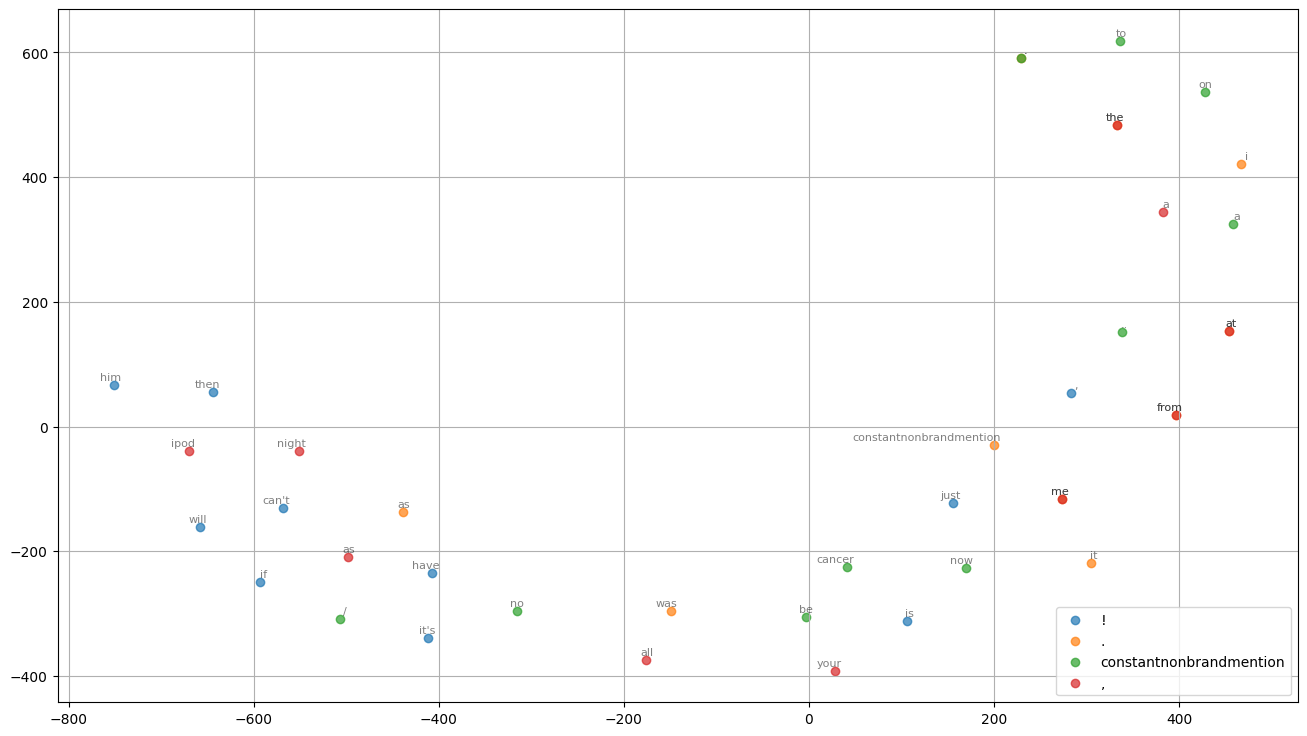

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig('../pngs/08tsne_plot_similar_words.png', dpi=150)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)